**CSI 4142 Data Science** <br/>
*Assignment 1: Dataset Insights*

# Identification

Name: Eli Wynn<br/>
Student Number: 300248135

Name: Jack Snelgrove<br/>
Student Number: 300247435


Our datasets have been uploaded from the public repository:

- [github.com/eli-wynn/Datasets](https://github.com/eli-wynn/Datasets)

# Introduction

The goal of this report is to perform data analysis on a heart attack database and student placement dataset. The audience would be the general public wanting to learn about factors that could lead to a heart attack and students/educators wanting to examine student results after graduation respectively.

Imports:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Datasets

In [22]:
heart  = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/heart.csv"
placement = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/placementdata.csv"
heartData = pd.read_csv(heart)
placementData = pd.read_csv(placement)

# Dataset Descriptions
## [Placement Data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)
Author: RK <br>
Purpose: This dataset contains information about the students academic and training and placement status<br>
Shape: Columns: 12, Rows: 10000<br>
## [Heart Data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
Author: fedesoriano <br>
Purpose:<br>
Shape: Columns: 12, Rows: 918<br>

# Heart Failure Prediction Insights

All the proof of the insights is present in the code and subsequent table directly below the insight

1. The risk of heart problems increases dramatically after age 40 and drops off after 60. It is interesting that there is a drop off with age. Is that due to less older people being included in the data? or less older people surviving with a heart condition?

In [ ]:
plt.hist(heartData['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

2. Approximately 56% of individuals included in the data have heart disease

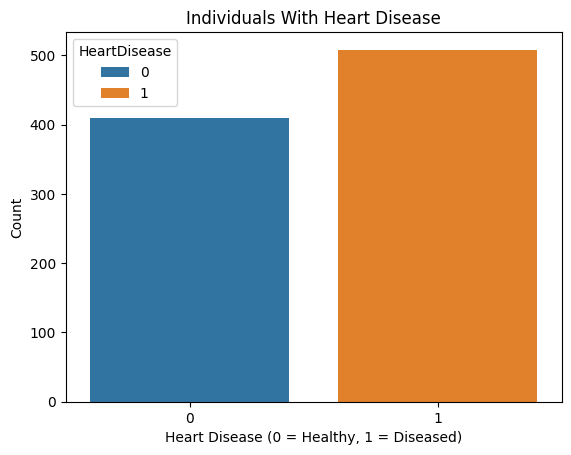

In [32]:
#code for a countplot from case study in class
sns.countplot(x="HeartDisease", hue="HeartDisease", data=heartData)
plt.title("Individuals With Heart Disease")
plt.xlabel("Heart Disease (0 = Healthy, 1 = Diseased)")
plt.ylabel("Count")
plt.show()

3. Approximately 20% of people have ATA chest pain, 23% have NAP chest pain, 5% have TA chest pain and 52% have ASY chest pain
- TA -> Typical Angina
- ASY -> Asymptomatic
- ATA -> Atypical Angina
- NAP -> Non-Anginal Pain

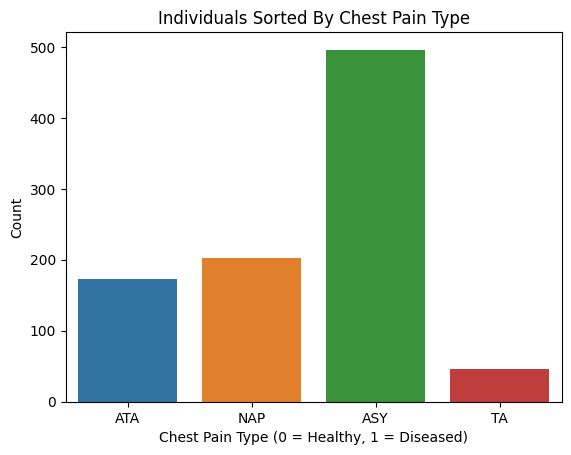

In [33]:
#code for a countplot from case study in class
sns.countplot(x="ChestPainType", hue="ChestPainType", data=heartData)
plt.title("Individuals Sorted By Chest Pain Type")
plt.xlabel("Chest Pain Type (0 = Healthy, 1 = Diseased)")
plt.ylabel("Count")
plt.show()

4. Approximately 34% of participants had low risk cholestoral, ~27% had medium risk, ~28% had high risk and ~11% had extreme risk

The categories were made based upon information from this website: https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html. The kaggle dataset explains that the cholestorol levels, are the total (serum) cholestorol levels and says it is measured in mm/dl. I made the assumption that mm/dl is a typo and the correct reading is in mg/dl since that is the standard measurement and the only alternative I found is mmol/l.

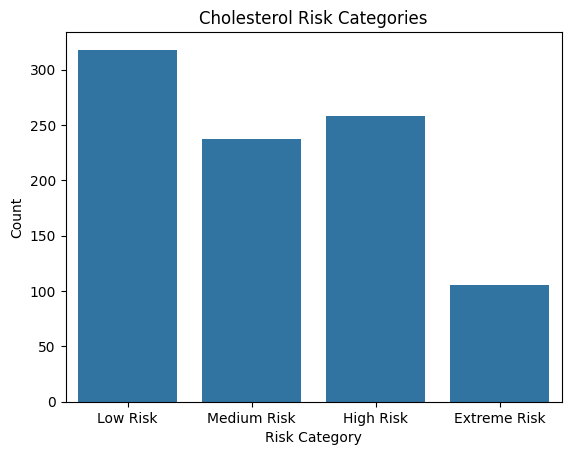

In [34]:
#function numbers for risk levels are sourced from the link above 
def categorize_cholesterol(chol):
    if chol < 200:
        return "Low Risk"
    elif 200 <= chol < 240:
        return "Medium Risk"
    elif 240 <= chol < 300:
        return "High Risk"
    else:
        return "Extreme Risk"

heartData["Cholesterol_Risk"] = heartData["Cholesterol"].apply(categorize_cholesterol)

sns.countplot(x="Cholesterol_Risk", data=heartData, order=["Low Risk", "Medium Risk", "High Risk", "Extreme Risk"])
plt.title("Cholesterol Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

5. There is a strong correlation between exercise induced angina and heart disease


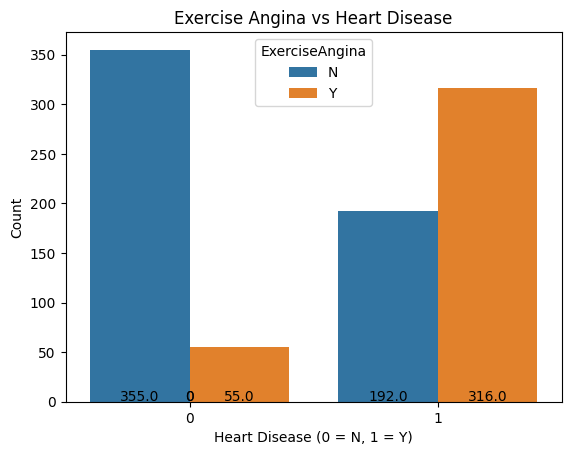

In [60]:
ax = sns.countplot(x="HeartDisease", data=heartData, hue="ExerciseAngina")
total = len(heartData)

for p in ax.patches:
    height = p.get_height()
    # Position the text below the bar
    ax.annotate(height, 
                (p.get_x() + p.get_width() / 2, 5),  # Position text below
                ha="center", va="center", fontsize=10, color="black")

plt.title("Exercise Angina vs Heart Disease")
plt.xlabel("Heart Disease (0 = N, 1 = Y)")
plt.ylabel("Count")
plt.show()

510 people don't have heart disease (355/510)*100 ~= 70% of people without heart disease don't have exercise induced angina
508 people do have heart disease (316/508)*100 ~= 62% of people with heart disease also have exercise induced angina

6. approximately 61% of people with extreme or low cholestorol are asymptomatic in terms of chest pain. People with medium or high cholestorol levels are more likely to experience chest pain at approximately 48.5%


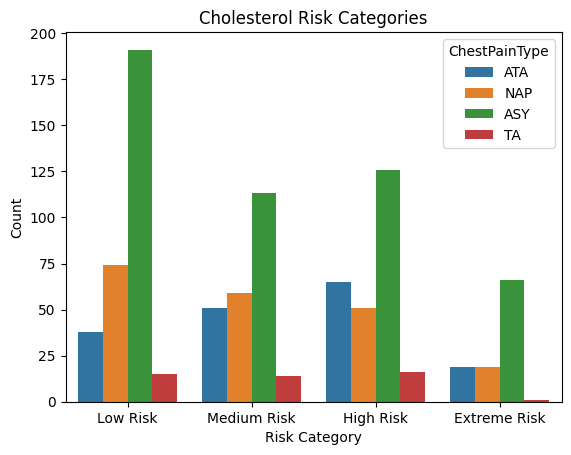

Cholestorol Risk: 
   Cholesterol_Risk ChestPainType  Percentage
0      Extreme Risk           ASY   62.857143
1      Extreme Risk           ATA   18.095238
2      Extreme Risk           NAP   18.095238
3      Extreme Risk            TA    0.952381
4         High Risk           ASY   48.837209
5         High Risk           ATA   25.193798
6         High Risk           NAP   19.767442
7         High Risk            TA    6.201550
8          Low Risk           ASY   60.062893
9          Low Risk           NAP   23.270440
10         Low Risk           ATA   11.949686
11         Low Risk            TA    4.716981
12      Medium Risk           ASY   47.679325
13      Medium Risk           NAP   24.894515
14      Medium Risk           ATA   21.518987
15      Medium Risk            TA    5.907173


In [41]:
sns.countplot(x="Cholesterol_Risk", data=heartData, order=["Low Risk", "Medium Risk", "High Risk", "Extreme Risk"], hue="ChestPainType")
plt.title("Cholesterol Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

percentage_data = (
    heartData.groupby("Cholesterol_Risk")["ChestPainType"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

print("Cholestorol Risk: ")
print(percentage_data)

7. There is a small correlation between Age and increased cholestorol

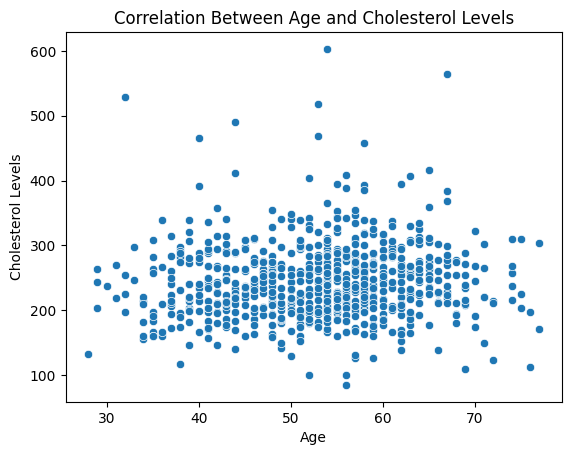

In [62]:
tempData = heartData[heartData['Cholesterol']!=0]
sns.scatterplot(x="Age", y="Cholesterol", data=tempData)

# need to remove 0 cholestorol values - impossible to have zero cholestorol it must not have been measured
plt.title("Correlation Between Age and Cholesterol Levels")
plt.xlabel("Age")
plt.ylabel("Cholesterol Levels")
plt.show()

Looking at the above plot there is a slight trend of increased cholestorol as age increases but it is not significant and there are many outliers. 

8. There is no correlation between RestingBP and MaxHR

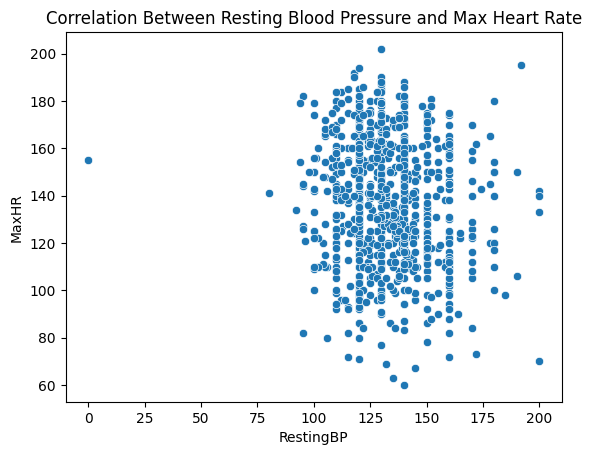

In [ ]:
sns.scatterplot(x="RestingBP", y="MaxHR", data=heartData)

plt.title("Correlation Between Resting Blood Pressure and Max Heart Rate")
plt.xlabel("RestingBP")
plt.ylabel("MaxHR")
plt.show()

9. Having High or Extremely High cholestorol levels makes you more at risk of heart disease. Interestingly the large majority of people with low risk cholestorol have heart disease. 

The high heart disease with low risk could be explained by cholestorol removing surgeries like or a lot of the high cholestorol people with heart disease passing away and as such not being present in the data

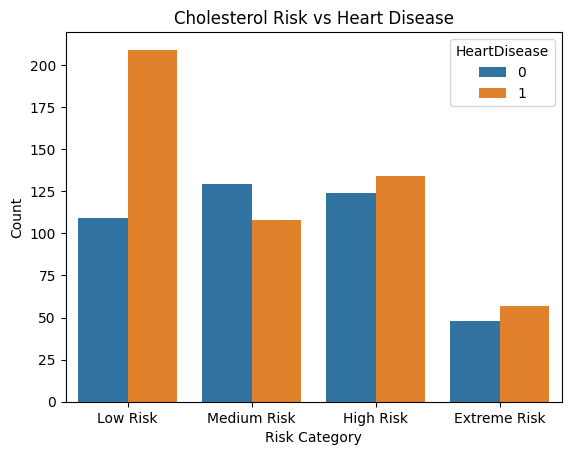

Cholestorol Risk: 
  Cholesterol_Risk  HeartDisease  Percentage
0     Extreme Risk             1   54.285714
1     Extreme Risk             0   45.714286
2        High Risk             1   51.937984
3        High Risk             0   48.062016
4         Low Risk             1   65.723270
5         Low Risk             0   34.276730
6      Medium Risk             0   54.430380
7      Medium Risk             1   45.569620


In [66]:
sns.countplot(x="Cholesterol_Risk", data=heartData, order=["Low Risk", "Medium Risk", "High Risk", "Extreme Risk"], hue="HeartDisease")
plt.title("Cholesterol Risk vs Heart Disease")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

percentage_data = (
    heartData.groupby("Cholesterol_Risk")["HeartDisease"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

print("Cholestorol Risk: ")
print(percentage_data)

10. The various distributions highlight how numerous factors can be associated with heart disease and not one thing is entirely responsible or indicative of heart disease

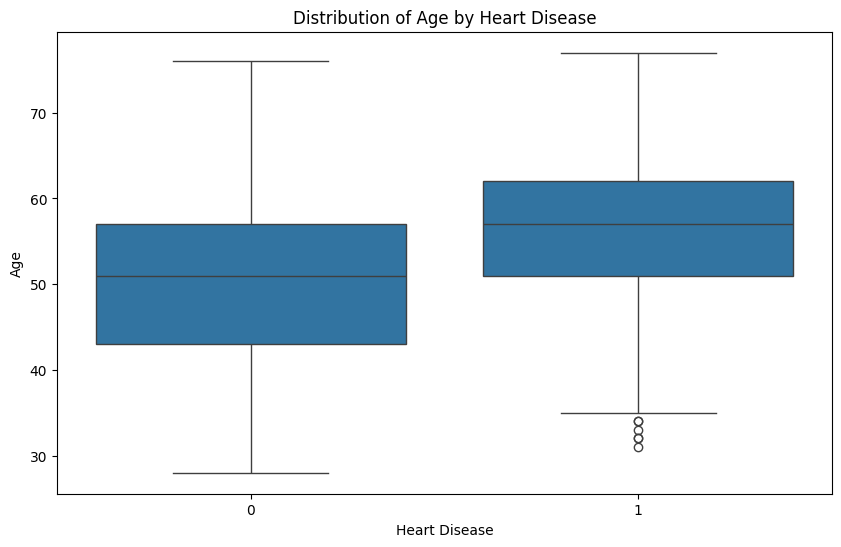

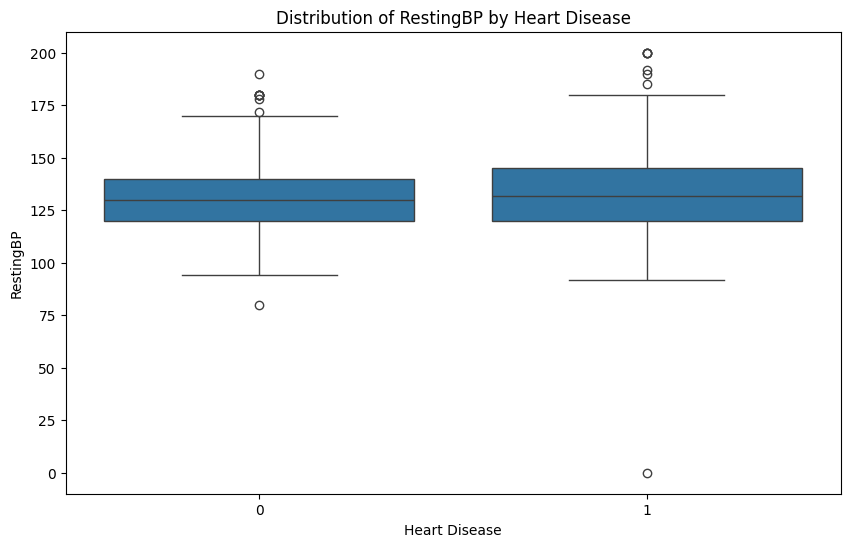

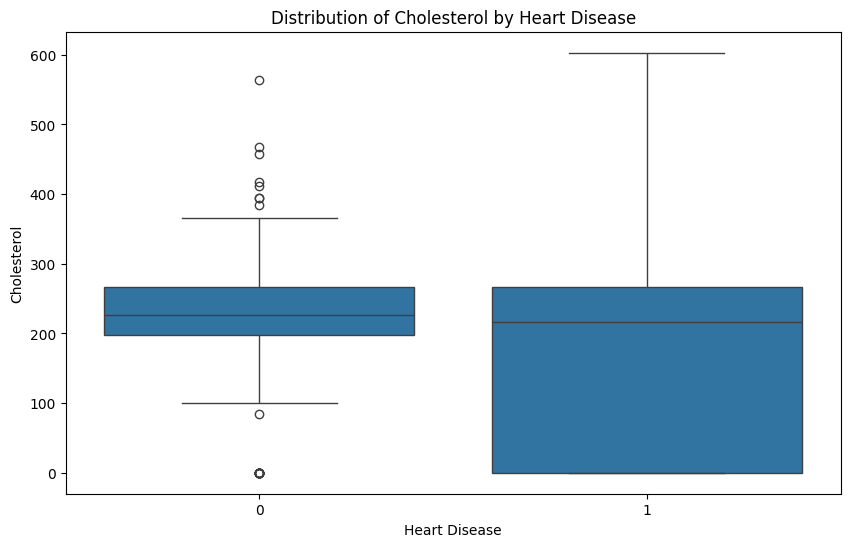

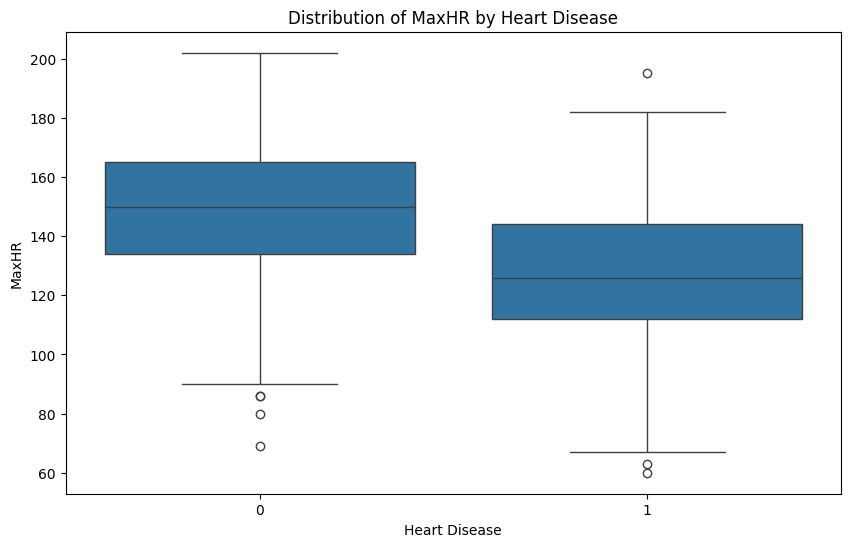

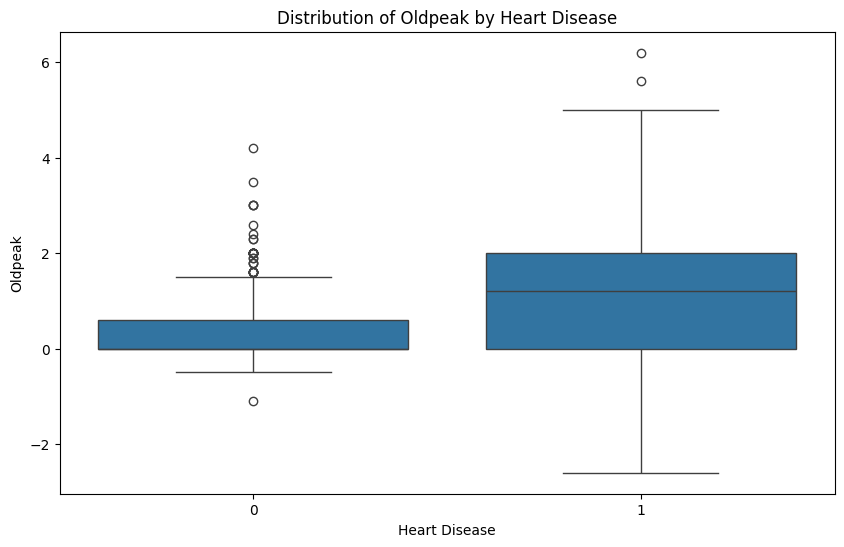

In [72]:
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="HeartDisease", y=col, data=heartData)
    plt.title(f"Distribution of {col} by Heart Disease")
    plt.xlabel("Heart Disease")
    plt.ylabel(col)
    plt.show()

## Placement Insight

1. How many student who were surveyed got Placed vs Not placed?

In [ ]:
#Creates a pandas Series that represnts the count of students who are Placed vs NotPlaced
status_counts = placementData['PlacementStatus'].value_counts()

#Define the figure size
plt.figure(figsize=(8, 6))

#Creates a bar chart with the status_counts Series
status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Count of PlacementStatus', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add the exact count on top of each bar
plt.text(1, status_counts['Placed'] + 1, f"{status_counts['Placed']}", ha='center', fontsize=12)
plt.text(0, status_counts['NotPlaced'] + 1, f"{status_counts['NotPlaced']}", ha='center', fontsize=12)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Insight #1: Based on the chart above, ~58% of the students who were surveyed were placed in internships <br><br>
2. Did the number of completed internships effect the number of students who got placed? 